In [268]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from datetime import date

In [269]:
covid = pd.read_csv('https://covid19.who.int/WHO-COVID-19-global-data.csv', skipinitialspace=True)
covid['Date_reported'] = pd.to_datetime(covid['Date_reported'])
print(covid.shape)
covid.head()

(35247, 8)


,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-02-24,AF,Afghanistan,EMRO,5,5,0,0
1,2020-02-25,AF,Afghanistan,EMRO,0,5,0,0
2,2020-02-26,AF,Afghanistan,EMRO,0,5,0,0
3,2020-02-27,AF,Afghanistan,EMRO,0,5,0,0
4,2020-02-28,AF,Afghanistan,EMRO,0,5,0,0


In [270]:
from io import BytesIO
from zipfile import ZipFile
import urllib.request

population_url = 'http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=csv'
request = urllib.request.urlopen(population_url)
populations = None

with ZipFile(BytesIO(request.read())) as zip_file:
    for contained_file in zip_file.namelist():
        if not contained_file.startswith('Metadata'):
            print(contained_file)
            populations = pd.read_csv(zip_file.open(contained_file), skiprows=4)

populations = populations.rename(columns={'Country Code': 'ISO3166-1-Alpha-3',
                                          '2019': 'Population'})
populations = populations.set_index('ISO3166-1-Alpha-3')
populations = populations[['Population']]

print(populations.shape)
populations.head()

API_SP.POP.TOTL_DS2_en_csv_v2_1308146.csv
(264, 1)


,Population
ISO3166-1-Alpha-3,
ABW,106314.0
AFG,38041754.0
AGO,31825295.0
ALB,2854191.0
AND,77142.0


In [271]:
country_codes = pd.read_csv('https://datahub.io/core/country-codes/r/country-codes.csv')
country_codes = country_codes.set_index('ISO3166-1-Alpha-2')
country_codes = country_codes[['ISO3166-1-Alpha-3']]

print(country_codes.shape)
country_codes.head()

(250, 1)


,ISO3166-1-Alpha-3
ISO3166-1-Alpha-2,
TW,TWN
AF,AFG
AL,ALB
DZ,DZA
AS,ASM


In [272]:
covid = covid.merge(country_codes, left_on='Country_code', right_on='ISO3166-1-Alpha-2', how="inner")
print(covid.shape)

covid = covid.merge(populations, on='ISO3166-1-Alpha-3', how="inner")
covid = covid.set_index(['Country_code'])
covid['Country_code'] = covid.index

print(covid.shape)
covid.head()

(35441, 9)
(32952, 10)


,Date_reported,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,ISO3166-1-Alpha-3,Population,Country_code
Country_code,,,,,,,,,,
AF,2020-02-24,Afghanistan,EMRO,5,5,0,0,AFG,38041754.0,AF
AF,2020-02-25,Afghanistan,EMRO,0,5,0,0,AFG,38041754.0,AF
AF,2020-02-26,Afghanistan,EMRO,0,5,0,0,AFG,38041754.0,AF
AF,2020-02-27,Afghanistan,EMRO,0,5,0,0,AFG,38041754.0,AF
AF,2020-02-28,Afghanistan,EMRO,0,5,0,0,AFG,38041754.0,AF


In [273]:
covid.index

Index(['AF', 'AF', 'AF', 'AF', 'AF', 'AF', 'AF', 'AF', 'AF', 'AF',
       ...
       'ZW', 'ZW', 'ZW', 'ZW', 'ZW', 'ZW', 'ZW', 'ZW', 'ZW', 'ZW'],
      dtype='object', name='Country_code', length=32952)

In [274]:
multiplier_100k = 100000
covid['New_cases_per_100k'] = covid['New_cases'] / (covid['Population'] / multiplier_100k)

covid.head(100)

,Date_reported,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,ISO3166-1-Alpha-3,Population,Country_code,New_cases_per_100k
Country_code,,,,,,,,,,,
AF,2020-02-24,Afghanistan,EMRO,5,5,0,0,AFG,38041754.0,AF,0.013143
AF,2020-02-25,Afghanistan,EMRO,0,5,0,0,AFG,38041754.0,AF,0.000000
AF,2020-02-26,Afghanistan,EMRO,0,5,0,0,AFG,38041754.0,AF,0.000000
AF,2020-02-27,Afghanistan,EMRO,0,5,0,0,AFG,38041754.0,AF,0.000000
AF,2020-02-28,Afghanistan,EMRO,0,5,0,0,AFG,38041754.0,AF,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
AF,2020-05-29,Afghanistan,EMRO,643,13659,11,246,AFG,38041754.0,AF,1.690248
AF,2020-05-30,Afghanistan,EMRO,784,14443,2,248,AFG,38041754.0,AF,2.060893
AF,2020-05-31,Afghanistan,EMRO,651,15094,2,250,AFG,38041754.0,AF,1.711278


In [284]:
# countries = ['DE', 'GB', 'CH', 'MT', 'HR', 'US', 'BR', 'CN']
countries = ['DE', 'GB', 'CH', 'MT', 'HR', 'CN']

def prep_graph_data(data, countries, plot_column):
    graph_data = pd.DataFrame(data=None, index=pd.Index(data=[],name='Date reported'))

    for country in countries:
        country_data = data.xs(country).set_index('Date_reported')
        country_name = country_data['Country'][0]
        print(country_name)
        country_data = country_data[[plot_column]]
        country_data = country_data.rename(columns={plot_column: country_name})
        graph_data = graph_data.join(country_data, how="outer")

    graph_data = graph_data[graph_data['Malta'].map(math.isnan) == False]
    return graph_data[graph_data >= 0]
    
new_cases_per_100k = prep_graph_data(covid, countries, 'New_cases_per_100k')
new_cases_per_100k

Germany
The United Kingdom
Switzerland
Malta
Croatia
China


,Germany,The United Kingdom,Switzerland,Malta,Croatia,China
Date_reported,,,,,,
2020-03-07,0.341622,0.076308,0.676398,1.392611,0.024585,0.007298
2020-03-08,0.196072,0.121195,0.723046,0.000000,0.024585,0.003291
2020-03-09,0.066159,0.089774,0.758032,0.000000,0.000000,0.003220
2020-03-10,0.285086,0.085285,1.481079,0.198944,0.000000,0.001431
2020-03-11,0.188854,0.221443,2.367393,0.397889,0.024585,0.002218
...,...,...,...,...,...,...
2020-08-11,1.161996,1.220928,1.224514,4.575721,1.106331,0.008085
2020-08-12,1.474749,1.717678,2.180801,0.000000,2.237246,0.004364
2020-08-13,1.738183,1.509701,3.183736,15.517663,3.196066,0.005867


<AxesSubplot:xlabel='Date_reported'>

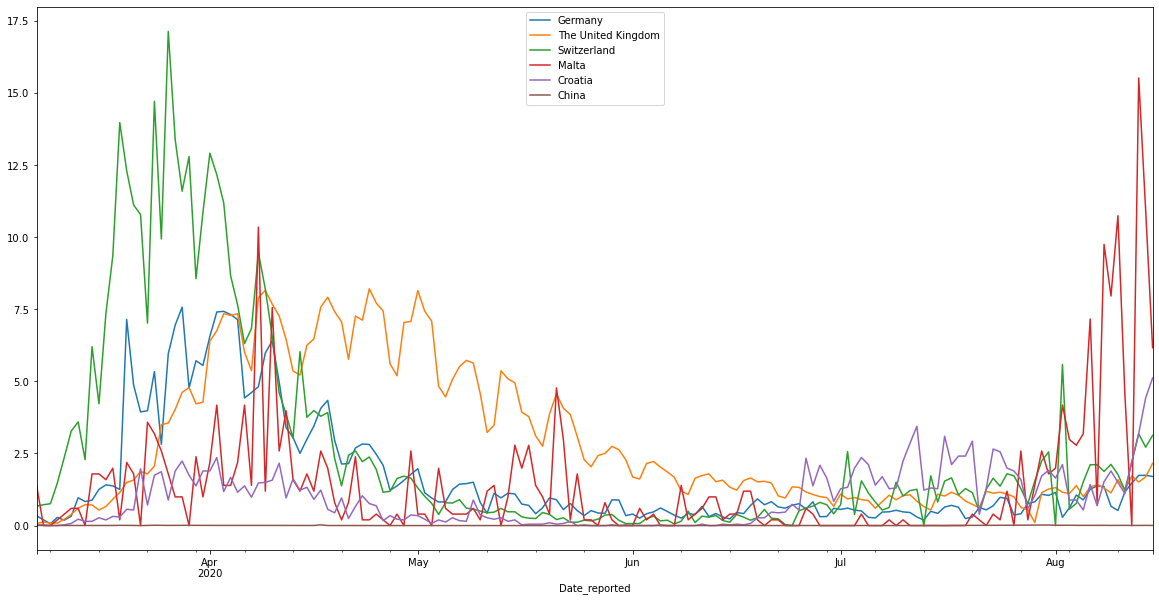

In [280]:
new_cases_per_100k.plot(figsize=(20,10))

In [285]:
def prev14(country_data, from_date):
    daterange = pd.date_range(end=from_date, periods=14)
    return country_data[country_data['Date_reported'].isin(daterange)]
    
# countries = covid.index.dropna().unique()
print(countries)
# countries = ['MT', 'CH', 'DE', 'HR', 'GB']

new_covid = pd.DataFrame(data=None, columns=covid.columns)
new_covid['14-day cumulative number of cases'] = []

for country in countries:
    print(country)
    country_data = covid.xs(country)
    country_data = country_data.set_index('Date_reported')
    country_data['Date_reported'] = country_data.index
    country_data['14-day cumulative number of cases'] = country_data.apply(lambda row:sum(prev14(country_data, row['Date_reported'])['New_cases']), axis=1)
    country_data = country_data.set_index('Country_code')
    new_covid = new_covid.append(country_data)

new_covid

new_covid['14-day cumulative number of cases per 100k'] = new_covid['14-day cumulative number of cases'] / (new_covid['Population'] / multiplier_100k)
new_covid

['DE', 'GB', 'CH', 'MT', 'HR', 'CN']
DE
GB
CH
MT
HR
CN


,Date_reported,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,ISO3166-1-Alpha-3,Population,Country_code,New_cases_per_100k,14-day cumulative number of cases,14-day cumulative number of cases per 100k
DE,2020-01-28,Germany,EURO,1,1,0,0,DEU,8.313280e+07,NaN,0.001203,1.0,0.001203
DE,2020-01-29,Germany,EURO,3,4,0,0,DEU,8.313280e+07,NaN,0.003609,4.0,0.004812
DE,2020-01-30,Germany,EURO,0,4,0,0,DEU,8.313280e+07,NaN,0.000000,4.0,0.004812
DE,2020-01-31,Germany,EURO,1,5,0,0,DEU,8.313280e+07,NaN,0.001203,5.0,0.006014
DE,2020-02-01,Germany,EURO,2,7,0,0,DEU,8.313280e+07,NaN,0.002406,7.0,0.008420
...,...,...,...,...,...,...,...,...,...,...,...,...,...
CN,2020-08-12,China,WPRO,61,89444,3,4699,CHN,1.397715e+09,NaN,0.004364,1987.0,0.142161
CN,2020-08-13,China,WPRO,82,89526,5,4704,CHN,1.397715e+09,NaN,0.005867,1846.0,0.132073
CN,2020-08-14,China,WPRO,99,89625,3,4707,CHN,1.397715e+09,NaN,0.007083,1669.0,0.119409
CN,2020-08-15,China,WPRO,70,89695,1,4708,CHN,1.397715e+09,NaN,0.005008,1573.0,0.112541


Germany
The United Kingdom
Switzerland
Malta
Croatia
China


<AxesSubplot:xlabel='Date_reported'>

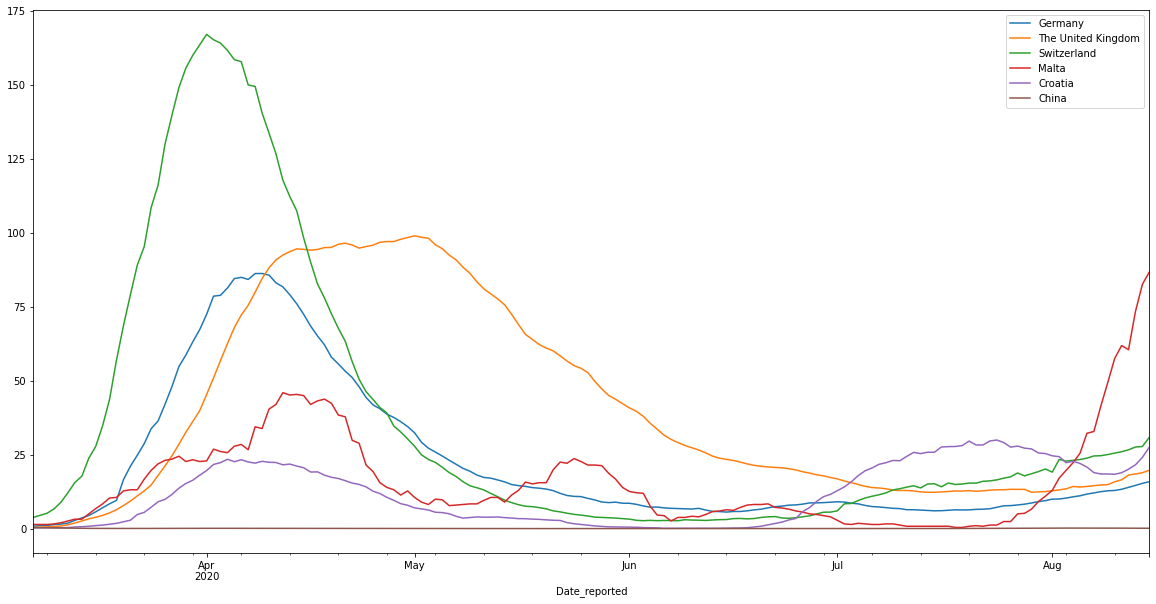

In [286]:
cum14data = prep_graph_data(new_covid, countries, '14-day cumulative number of cases per 100k')
cum14data.plot(figsize=(20,10))